In [1]:
%matplotlib inline

In [22]:
from json_log_reader import *
from matplotlib.pyplot import *
from pandas import *

In [3]:
data_by_message = read_all_files(data_dir)
print('\n'.join(str(group) for group in data_by_message))

('INFO', 'End of Comm')
('INFO', 'End Trial')
('INFO', 'Begin Trial!')
('INFO', 'Comm')
('INFO', 'State-Action')
('INFO', 'Query Step')


In [4]:
query_data = data_by_message[('INFO', 'Query Step')]
print(query_data.columns)

Index(['Query', 'Response', 'Trial', 'levelname', 'message', 'timestamp',
       'comm_branch_factor', 'comm_cost', 'comm_iterations', 'experience',
       'heuristic_id', 'plan_iterations', 'process_no', 'scenario_id',
       'trials'],
      dtype='object')


In [5]:
comm_end_data = data_by_message[('INFO','End of Comm')]
print(comm_end_data.columns)

Index(['New EV', 'New action', 'Trial', 'levelname', 'message', 'timestamp',
       'comm_branch_factor', 'comm_cost', 'comm_iterations', 'experience',
       'heuristic_id', 'plan_iterations', 'process_no', 'scenario_id',
       'trials'],
      dtype='object')


In [17]:
for group, groupdf in comm_end_data.groupby(paramlist):
    print(group)
    print(groupdf[['New EV', 'Trial']])

(100, 2, 5, 0, 1, 1, 0, 100, 2)
        New EV  Trial
3   124.573524    0.0
6    50.484853    0.0
9    22.162713    0.0
10    5.250006    0.0
11    8.000000    0.0
16  108.393333    1.0
18    5.714020    1.0
(100, 2, 125, 0, 1, 2, 0, 100, 2)
         New EV  Trial
4   6515.442730    0.0
5      4.444442    0.0
11  2043.835489    1.0
16  4733.480801    1.0
18    23.000001    1.0
19     6.000000    1.0
(100, 2, 525, 0, 1, 2, 0, 100, 2)
          New EV  Trial
5   3.820294e+05    0.0
9   2.383433e+01    0.0
10  6.666667e+00    0.0
11  7.000000e+00    0.0
17  1.272925e+06    1.0
22  0.000000e+00    1.0


In [28]:
comm_end_data['Step'] = comm_end_data.groupby(paramlist + ['Trial']).cumcount()

plan_iterations  comm_branch_factor  comm_iterations  scenario_id  comm_cost  process_no  heuristic_id  experience  trials  Trial
100              2                   5                0            1          1           0             100         2       0.0      AxesSubplot(0.125,0.125;0.775x0.755)
                                                                                                                            1.0      AxesSubplot(0.125,0.125;0.775x0.755)
                                     125              0            1          2           0             100         2       0.0      AxesSubplot(0.125,0.125;0.775x0.755)
                                                                                                                            1.0      AxesSubplot(0.125,0.125;0.775x0.755)
                                     525              0            1          2           0             100         2       0.0      AxesSubplot(0.125,0.125;0.775x0.755)
                    

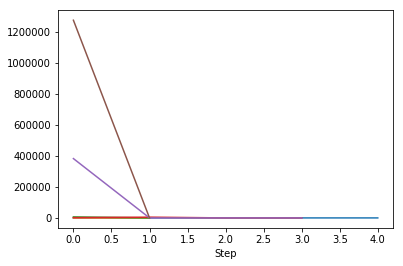

In [30]:
comm_end_data.groupby(paramlist + ['Trial']).plot(x='Step', y='New EV', ax=subplot(1,1,1), legend=False)